<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>WINE QUALITY DATASET</center></b></div>

### [Dataset used in this EDA](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)


<a id='top'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>TABLE OF CONTENTS</center></b></div>

### [**1. Importing libraries, defining constant variables and loading dataset**](#content-one)

### [**2. Data Information**](#content-two)

### [**3. Exploratory Data Analysis**](#content-three)

### [**4. Machine Learning**](#content-four)

### [**5. Cross-Validation (parameter fine-tuning)**](#content-five)

### [**6. Binary Classification**](#content-six)

### [**7. Summary of the project**](#content-seven)

<a id='content-one'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Importing libraries, defining constant variables and loading dataset</center></b></div>
<div style="padding:10px;">  </div>

<font size="+2"><b style="font-weight:normal">1.1 <span style='color:#FF281B; font-weight:normal'>|</span> Imports </b></font>

In [19]:
import warnings

import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import boxcox
from sklearn.metrics import f1_score, make_scorer
from catboost import CatBoostClassifier
from scipy.stats import lognorm
import statsmodels.api as sm

%matplotlib inline

<font size="+2"><b style="font-weight:normal">1.2 <span style='color:#FF281B; font-weight:normal'>|</span> Constants </b></font>

<font size="+2"><b style="font-weight:normal">1.3 <span style='color:#FF281B; font-weight:normal'>|</span> Data loading </b></font>

In [3]:
wine_data = pd.read_csv("./data/WineQT.csv")

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<font size="+2"><b style="font-weight:normal">1.4 <span style='color:#FF281B; font-weight:normal'>|</span> Organizing data </b></font>

Creating a data backup to modify the original data. We would like to remove `Id` column and change the `quality` feature scale from [3, 8] to [0, 5]

In [5]:
df = wine_data.copy()
del df["Id"]
df["quality"] = df["quality"] - 3
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


<a id='content-two'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Data Information</center></b></div>
<div style="padding:10px;">  </div>

<font size="+2"><b style="font-weight:normal">2. <span style='color:#FF281B; font-weight:normal'>|</span> Data Information </b></font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


<a id='content-three'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Exploratory Data Analysis</center></b></div>
<div style="padding:10px;">  </div>

<font size="+2"><b style="font-weight:normal">3.1 <span style='color:#FF281B; font-weight:normal'>|</span> Number of missing data </b></font>

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing data, which is great for us

<font size="+2"><b style="font-weight:normal">3.2 <span style='color:#FF281B; font-weight:normal'>|</span> Statistics of the dataset </b></font>

In [8]:
df.describe()[1:].style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


The data has a different scale, which will affect the training of our model. Later, we will have to normalize the data to avoid over-fitting and other problems

<font size="+2"><b style="font-weight:normal">3.3 <span style='color:#FF281B; font-weight:normal'>|</span> Unique values </b></font>

In [8]:
df.nunique().sort_values(ascending=True)

quality                   6
free sulfur dioxide      53
alcohol                  61
citric acid              77
residual sugar           80
pH                       87
sulphates                89
fixed acidity            91
chlorides               131
volatile acidity        135
total sulfur dioxide    138
density                 388
dtype: int64

In [9]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

Unique values of `quality` column after scaling

<font size="+2"><b style="font-weight:normal">3.4 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Boxplot i Distributions </b></font>

As we can observe, most of the data has a negative or positive distribution instead of a symmetric one. If we replaced the outliers with the median value, the distribution would be more symmetrical (which we intend to check later).

Text(0.5, 0.98, 'Visualizing columns')

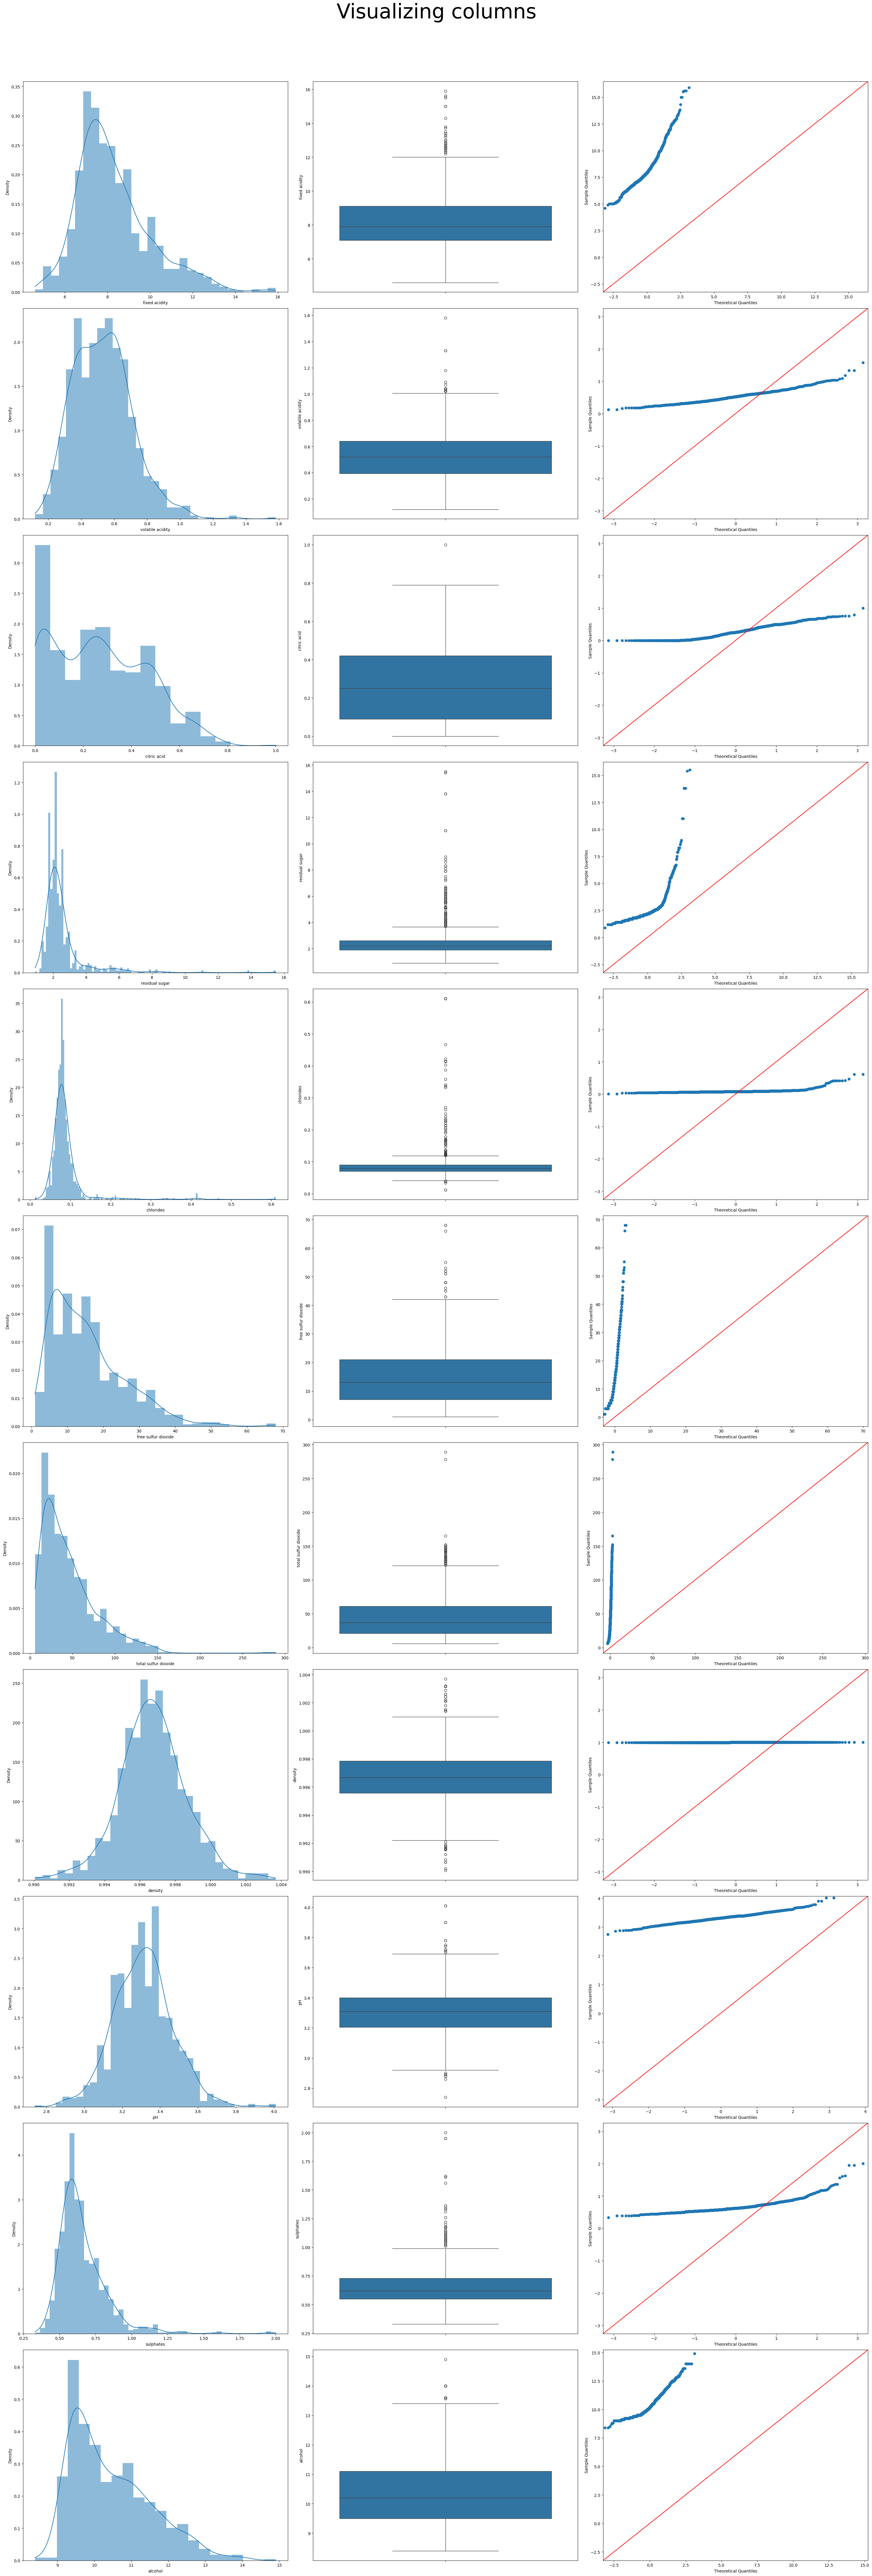

In [12]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(11, 3, figsize=(30, 90))

# Exclude `quality` feature from the charts (we only need "float64")
for index, i in enumerate(df.select_dtypes(include=["float64"]).columns):
    sns.histplot(df[i], ax=ax[index, 0], kde=True, stat="density", linewidth=0)
    sns.boxplot(df[i], ax=ax[index, 1])
    sm.qqplot(df[i], ax=ax[index, 2], line="45")

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing columns", fontsize=50)

In [13]:
skew_df = df.skew(numeric_only=True).sort_values()
skew_df

density                 0.102395
pH                      0.221138
quality                 0.286792
citric acid             0.371561
volatile acidity        0.681547
alcohol                 0.863313
fixed acidity           1.044930
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
residual sugar          4.361096
chlorides               6.026360
dtype: float64

In [14]:
kurtosis_df = df.kurtosis(numeric_only=True).sort_values()
kurtosis_df

citric acid             -0.714686
alcohol                  0.221179
quality                  0.314664
density                  0.888123
pH                       0.925791
volatile acidity         1.375531
fixed acidity            1.384614
free sulfur dioxide      1.932170
total sulfur dioxide     5.098748
sulphates               12.017377
residual sugar          27.675366
chlorides               47.078324
dtype: float64

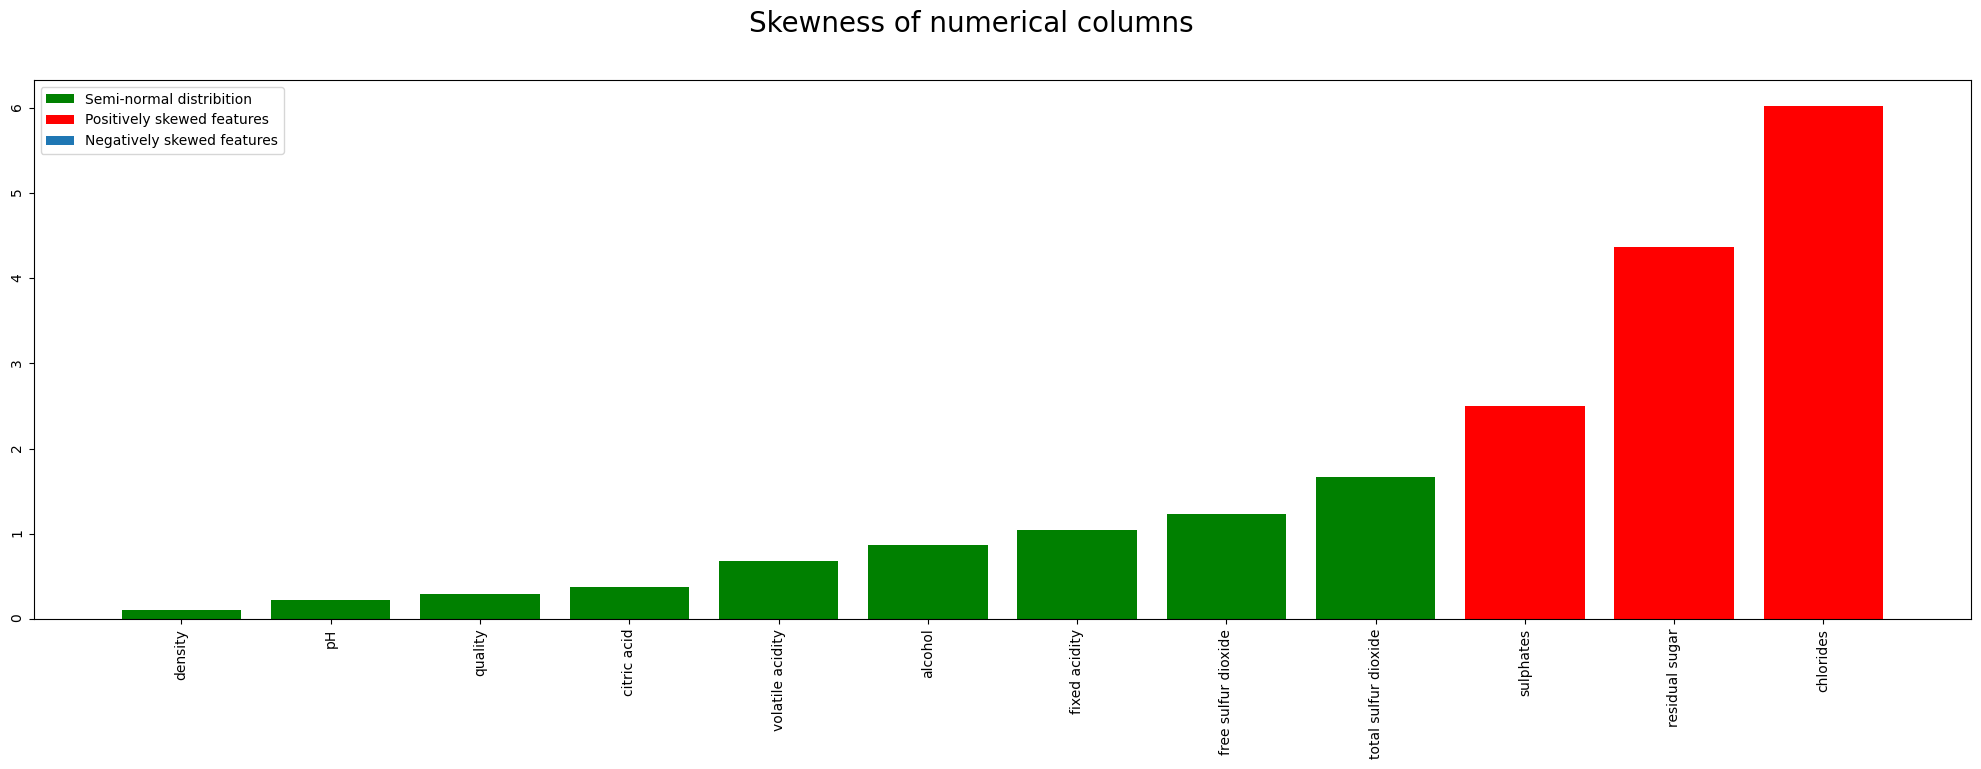

In [15]:
fig, ax = plt.subplots(figsize=(25, 7))

ax.bar(
    x=skew_df[(skew_df < 2) & (skew_df > -2)].index,
    height=skew_df[(skew_df < 2) & (skew_df > -2)],
    color="g",
    label="Semi-normal distribition",
)
ax.bar(
    x=skew_df[skew_df > 2].index,
    height=skew_df[skew_df > 2],
    color="r",
    label="Positively skewed features",
)
ax.bar(
    x=skew_df[skew_df < -2].index,
    height=skew_df[skew_df < -2],
    color="b",
    label="Negatively skewed features",
)
ax.legend()
fig.suptitle("Skewness of numerical columns", fontsize=20)
ax.tick_params(labelrotation=90)

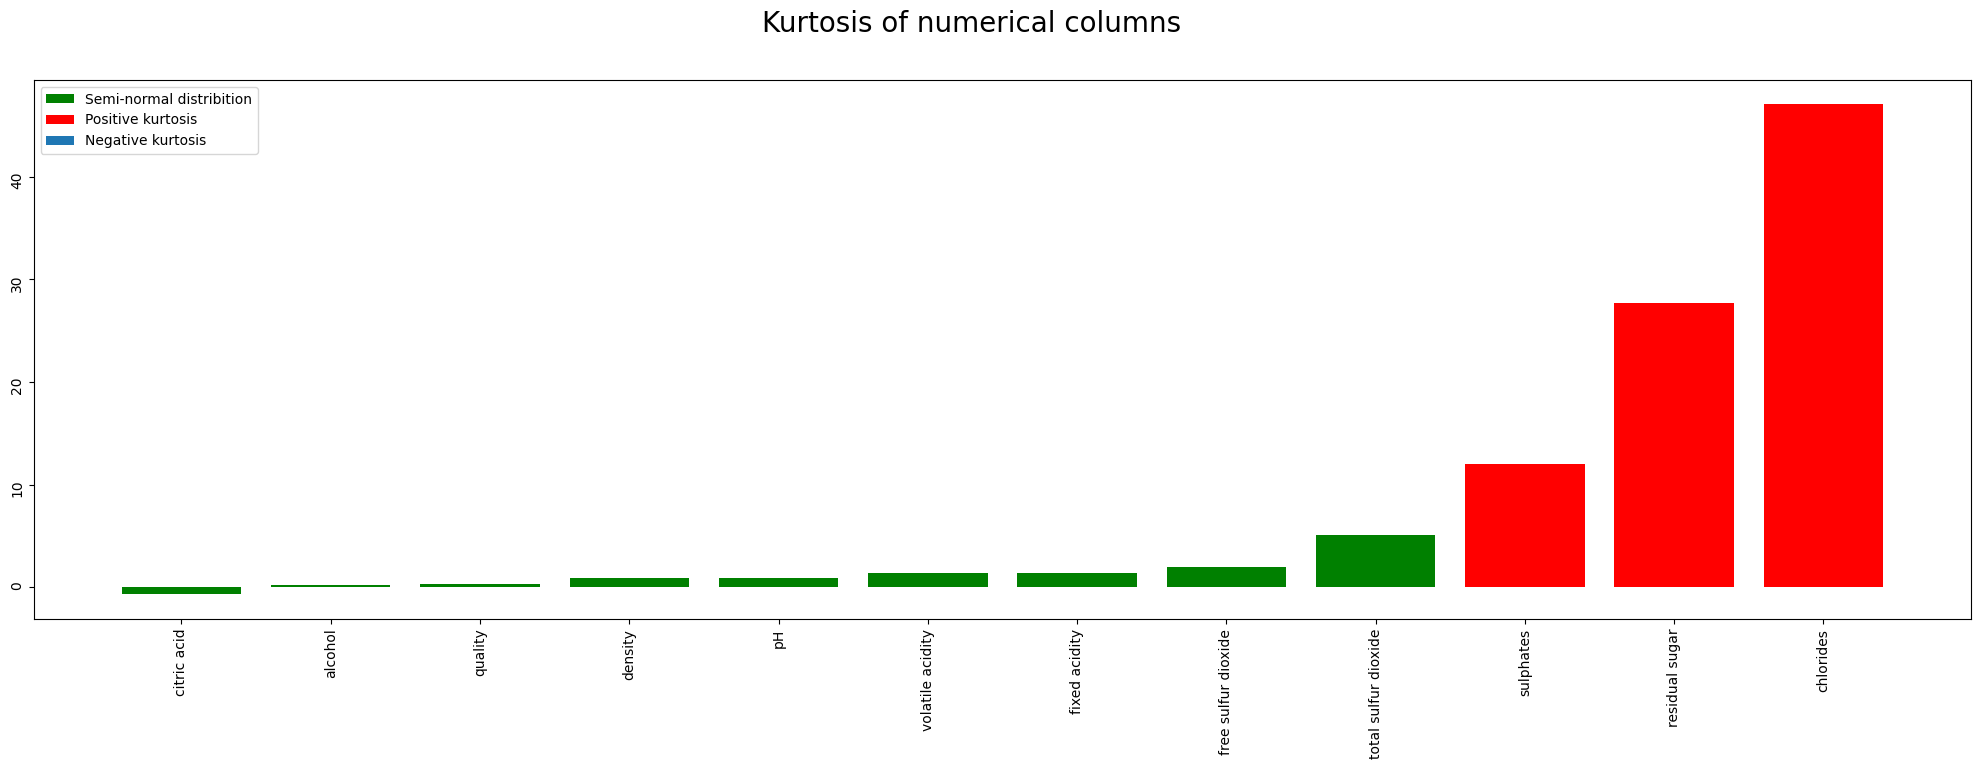

In [16]:
fig, ax = plt.subplots(figsize=(25, 7))

ax.bar(
    x=kurtosis_df[(kurtosis_df < 7) & (kurtosis_df > -7)].index,
    height=kurtosis_df[(kurtosis_df < 7) & (kurtosis_df > -7)],
    color="g",
    label="Semi-normal distribition",
)
ax.bar(
    x=kurtosis_df[kurtosis_df > 7].index,
    height=kurtosis_df[kurtosis_df > 7],
    color="r",
    label="Positive kurtosis",
)
ax.bar(
    x=kurtosis_df[kurtosis_df < -7].index,
    height=kurtosis_df[kurtosis_df < -7],
    color="b",
    label="Negative kurtosis",
)
ax.legend()
fig.suptitle("Kurtosis of numerical columns", fontsize=20)
ax.tick_params(labelrotation=90)

In [17]:
# We note our columns that have non-normal distrubutions
non_dist_cols = ['sulphates', 'residual sugar', 'chlorides']

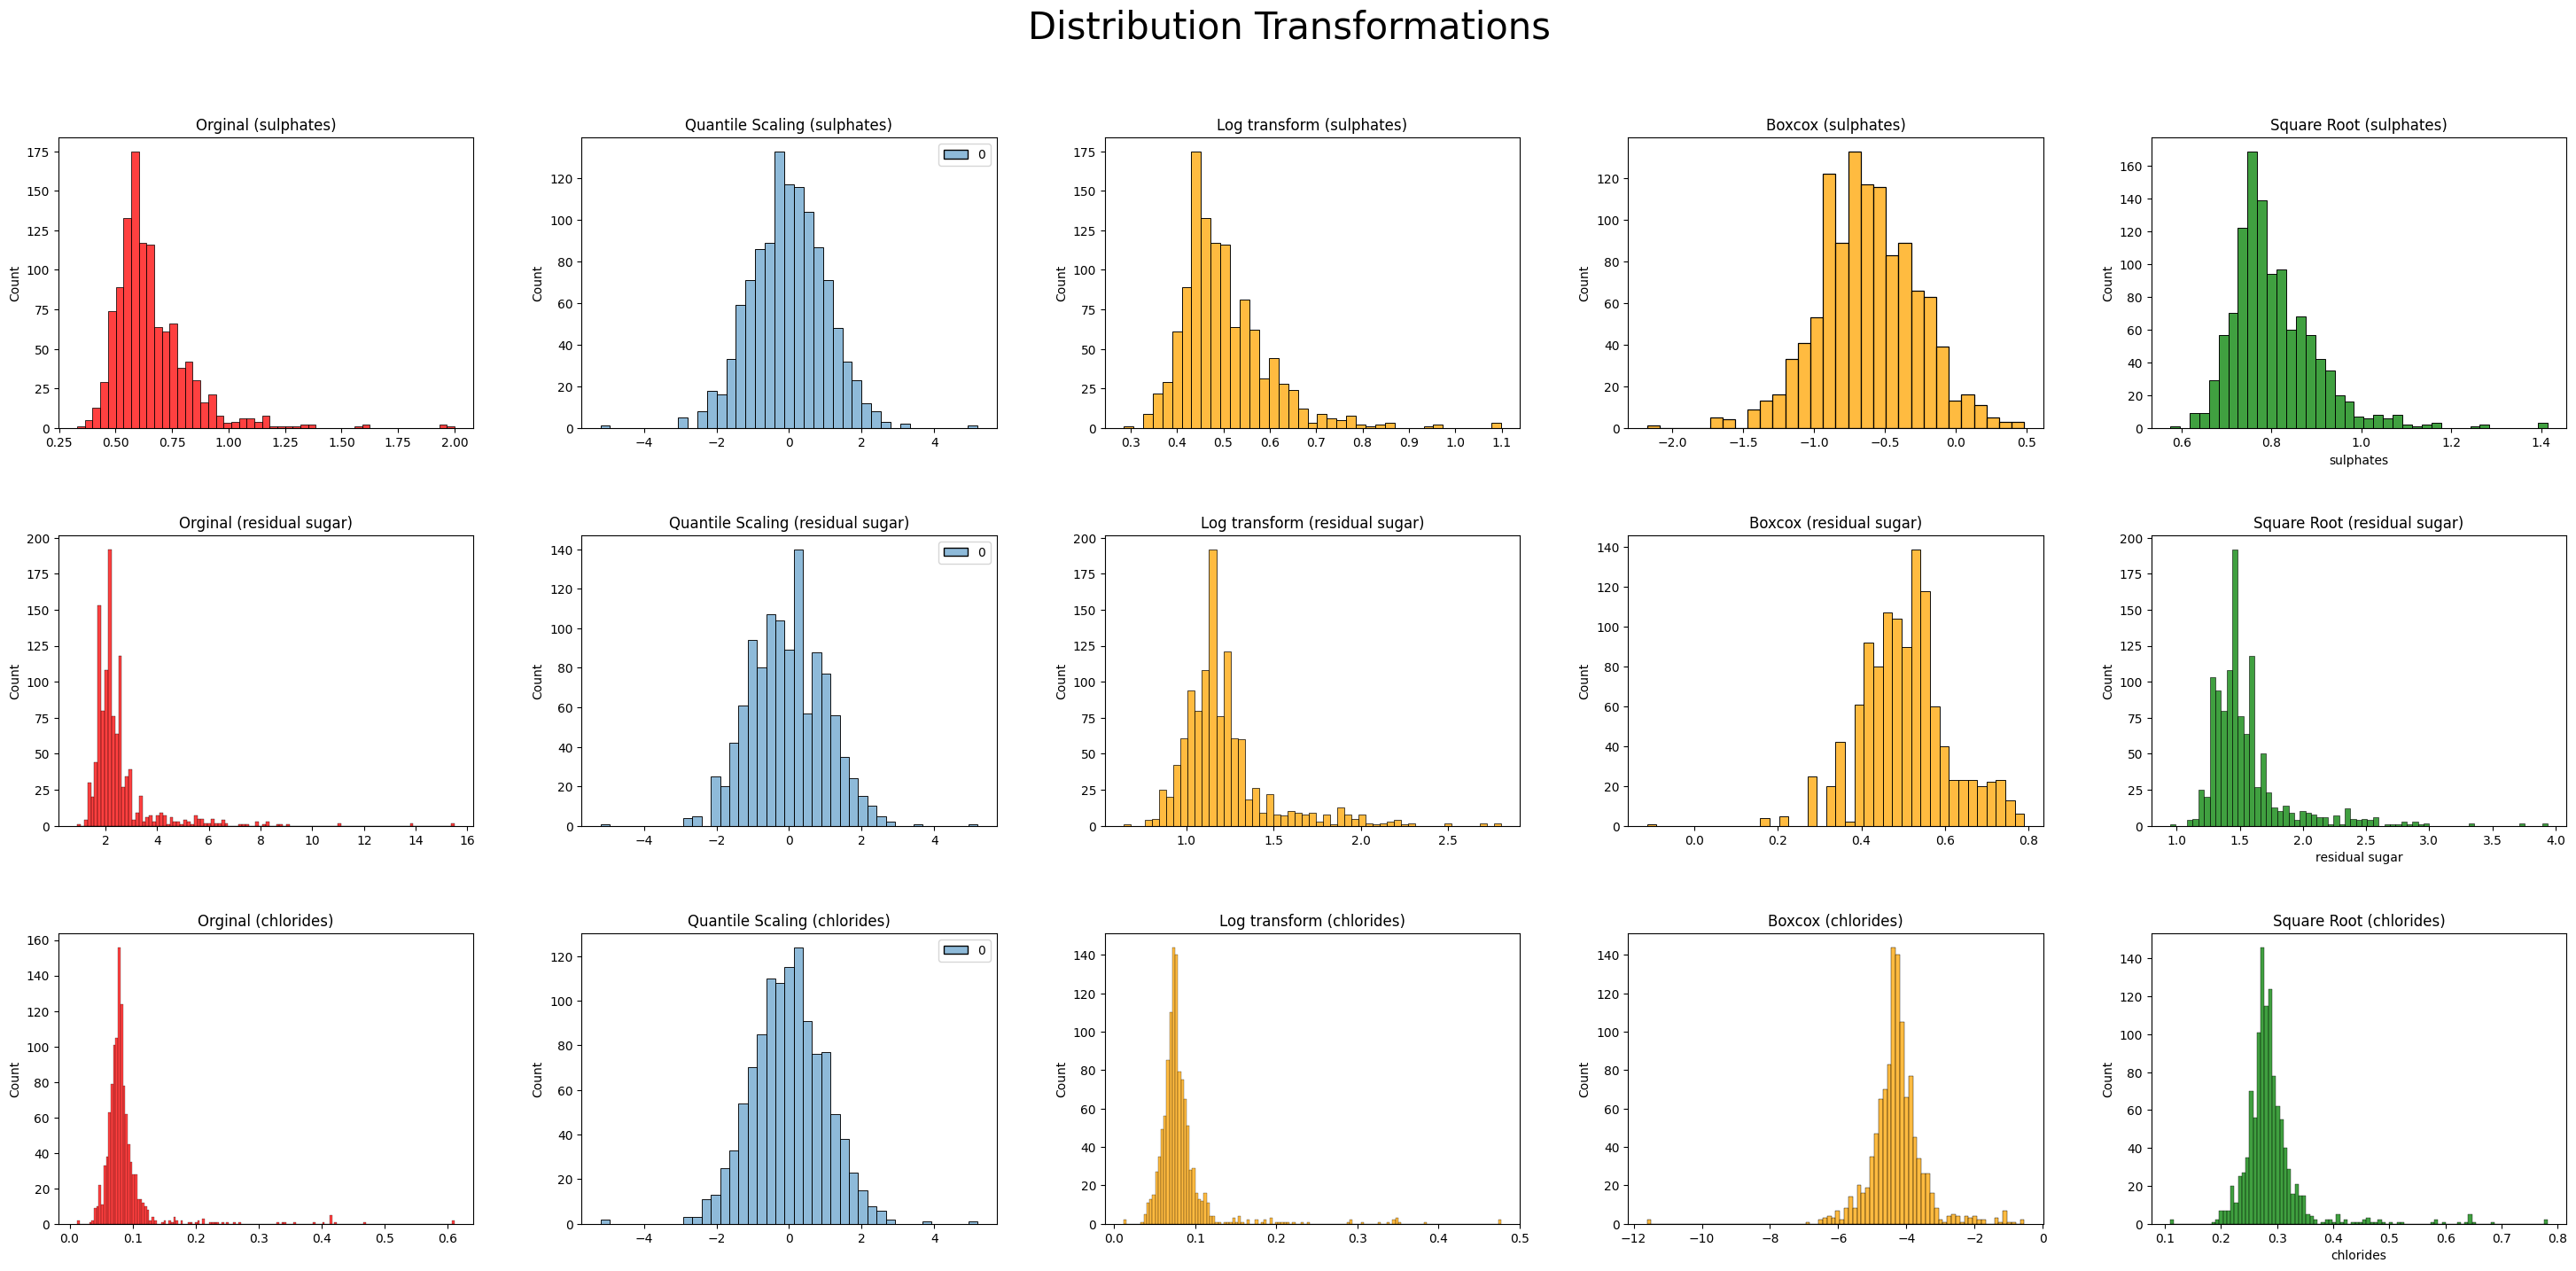

In [20]:
fig, ax = plt.subplots(len(non_dist_cols), 5, figsize=(30, 15))
for i, col in enumerate(non_dist_cols):
    # scale
    scaler = QuantileTransformer(output_distribution="normal")
    quant_df = scaler.fit_transform(df[[col]])

    sns.histplot(x=df[col], ax=ax[i, 0], color="r")
    sns.histplot(quant_df, ax=ax[i, 1])
    sns.histplot(np.log1p(df[col]), ax=ax[i, 2], color="orange")
    try:
        sns.histplot(boxcox(df[col])[0], ax=ax[i, 3], color="orange")
    except:
        pass
    sns.histplot(np.sqrt(df[col]), ax=ax[i, 4], color="green")
    ax[i, 0].set_title(f"Orginal ({col})")
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set_title(f"Quantile Scaling ({col})")
    ax[i, 2].set_title(f"Log transform ({col})")
    ax[i, 2].set(xlabel=None)
    ax[i, 3].set_title(f"Boxcox ({col})")
    ax[i, 4].set_title(f"Square Root ({col})")
plt.suptitle("Distribution Transformations", fontsize=30)
plt.tight_layout(pad=4)
plt.show()

In this case, it will be better to use Quantile Scaling instead of data normalization

<font size="+2"><b style="font-weight:normal">3.5 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - `quality` feature values </b></font>

<Axes: xlabel='quality', ylabel='count'>

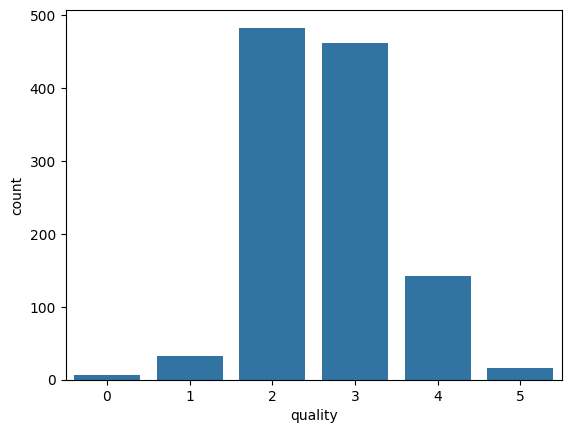

In [11]:
sns.countplot(data=df, x="quality")

The values of the `quality` feature are highly unbalanced. The most dominant values are 2 and 3, and the others (0, 1, 5) are almost absent from the set. We need to try using oversampling or/and undersampling methods to see if this will help us overcome this issue.

<font size="+2"><b style="font-weight:normal">3.6 <span style='color:#FF281B; font-weight:normal'>|</span> Correlation plot </b></font>

In [12]:
fig = px.imshow(df.corr(), color_continuous_scale="Blues")
fig.update_layout(height=600)
fig.show()

<font size="+2"><b style="font-weight:normal">3.7 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Distribution of collaterals in relation to `quality` </b></font>

In [13]:
df_corr_bar = df.corr().quality.sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation="h", color_discrete_sequence=["#4285f4"])
fig.update_layout(showlegend=False)
fig.show()

* The highest correlation is with the feature `alcohol` (increases with an increase in `quality`) and `volatile acidity` (decreases with an increase in `quality`)
* Some features (like `pH`, `residual sugar`) show a low level of correlation with the feature `quality`

<font size="+2"><b style="font-weight:normal">3.8 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Boxplot of the correlation between `quality`, and `volatile acidity` </b></font>

In [14]:
fig = go.Figure()

for x in range(6):
    fig.add_trace(
        go.Box(
            x=df[df.quality == x]["volatile acidity"],
            y=df[df.quality == x].quality,
            name="Quality " + str(x),
        )
    )

fig.update_layout(yaxis_title="quality", xaxis_title="volatile acidity")
fig.update_traces(orientation="h")
fig.show()

* `volatile acidity` has a correlation value of -0.407
* The lower the `volatile acidity` value, the higher the `quality` value

<font size="+2"><b style="font-weight:normal">3.9 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Scatter plot of `free suffur dioxide`, `total sulfur dioxide` and `quality` </b></font>

In [15]:
fig = px.scatter(
    df,
    x="total sulfur dioxide",
    y="free sulfur dioxide",
    color=df.quality,
    color_continuous_scale="Blues",
)
fig.update_layout(legend_title_text="Quality")

* As `total sulfur dioxide` increases, the value of `free sulfur dioxide` increases
* It appears that with the lower values of `total sulfur dioxide` and `free sulfur dioxide` the quality of the wine is better

<font size="+2"><b style="font-weight:normal">3.10 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Boxplot of the correlation between `quality`, and `citric acid` </b></font>

In [16]:
fig = go.Figure()

for x in range(6):
    fig.add_trace(
        go.Box(
            x=df[df.quality == x]["citric acid"],
            y=df[df.quality == x].quality,
            name="Quality " + str(x),
        )
    )

fig.update_layout(yaxis_title="quality", xaxis_title="citric acid")
fig.update_traces(orientation="h")
fig.show()

* Correlation value for `citric acid` is 0.241
* With a high value of `citric acid`, the quality of the wine is usually 0 and 5

<font size="+2"><b style="font-weight:normal">3.11 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Scatter plot of `fixed acitidy`, and `quality` </b></font>

In [17]:
fig = px.scatter(
    df,
    x="fixed acidity",
    y="density",
    color=df.quality,
    color_continuous_scale="Blues",
)
fig.update_layout(legend_title_text="Quality")

* There is no visible correlation between this two features
* Higher data density with the higher values of `fixed acidity`

<font size="+2"><b style="font-weight:normal">3.12 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Boxplot of the correlation between `quality`, and `sulphates` </b></font>

In [18]:
fig = go.Figure()

for x in range(6):
    fig.add_trace(
        go.Box(
            x=df[df.quality == x].sulphates,
            y=df[df.quality == x].quality,
            name="Quality " + str(x),
        )
    )

fig.update_layout(yaxis_title="quality", xaxis_title="sulphates")
fig.update_traces(orientation="h")
fig.show()

* `sulphates` has a correlation value of 0.258
* It can be observed that with the higher value of `sulphates` the quality of wine increases
* With the `quality` equal to 2, a large number of outliers can be observed

<font size="+2"><b style="font-weight:normal">3.13 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Scatter plot of `citric acid`, `quality` and `volatile acidity` </b></font>

In [19]:
fig = px.scatter(
    df,
    x="citric acid",
    y="volatile acidity",
    color=df.quality,
    color_continuous_scale="Blues",
)
fig.update_layout(legend_title_text="Quality")

* We can notice an inverted relationship between `volacity acidity` and `citric acid`. 
* Higher value of `citric acid` means lower value of `volacity acidity`
* Lower value of `volacity acidity` means better wine quality

<font size="+2"><b style="font-weight:normal">3.14 <span style='color:#FF281B; font-weight:normal'>|</span> Data Visualization - Boxplot of the correlation between `quality`, and `alcohol` </b></font>

In [20]:
fig = go.Figure()

for x in range(6):
    fig.add_trace(
        go.Box(
            x=df[df.quality == x].alcohol,
            y=df[df.quality == x].quality,
            name="Quality " + str(x),
        )
    )

fig.update_layout(yaxis_title="quality", xaxis_title="alcohol")
fig.update_traces(orientation="h")
fig.show()

* `alcohol` has a correlation value of 0.485
* The higher the alcohol level, the better the quality of wine

<font size="+2"><b style="font-weight:normal">3.15 <span style='color:#FF281B; font-weight:normal'>|</span> Feature importance graph </b></font>

I found information that for a numerical input variable and a categorical output variable it is worth using ANOVA to select features.
I decided not to use all the features from the dataset to reduce the complexity of the models. There are 11 features by default, and after reviewing the feature importance graph, their number was reduced to only 6 features. I will also try to compare the results with PCA.

In [22]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

In [22]:
fs = SelectKBest(score_func=f_classif, k="all")
fs.fit(X, y)

feature_contribution = (fs.scores_ / sum(fs.scores_)) * 100

fixed acidity : 2.09%
volatile acidity : 23.23%
citric acid : 8.58%
residual sugar : 0.60%
chlorides : 1.79%
free sulfur dioxide : 1.31%
total sulfur dioxide : 7.40%
density : 4.14%
pH : 2.01%
sulphates : 8.75%
alcohol : 40.10%


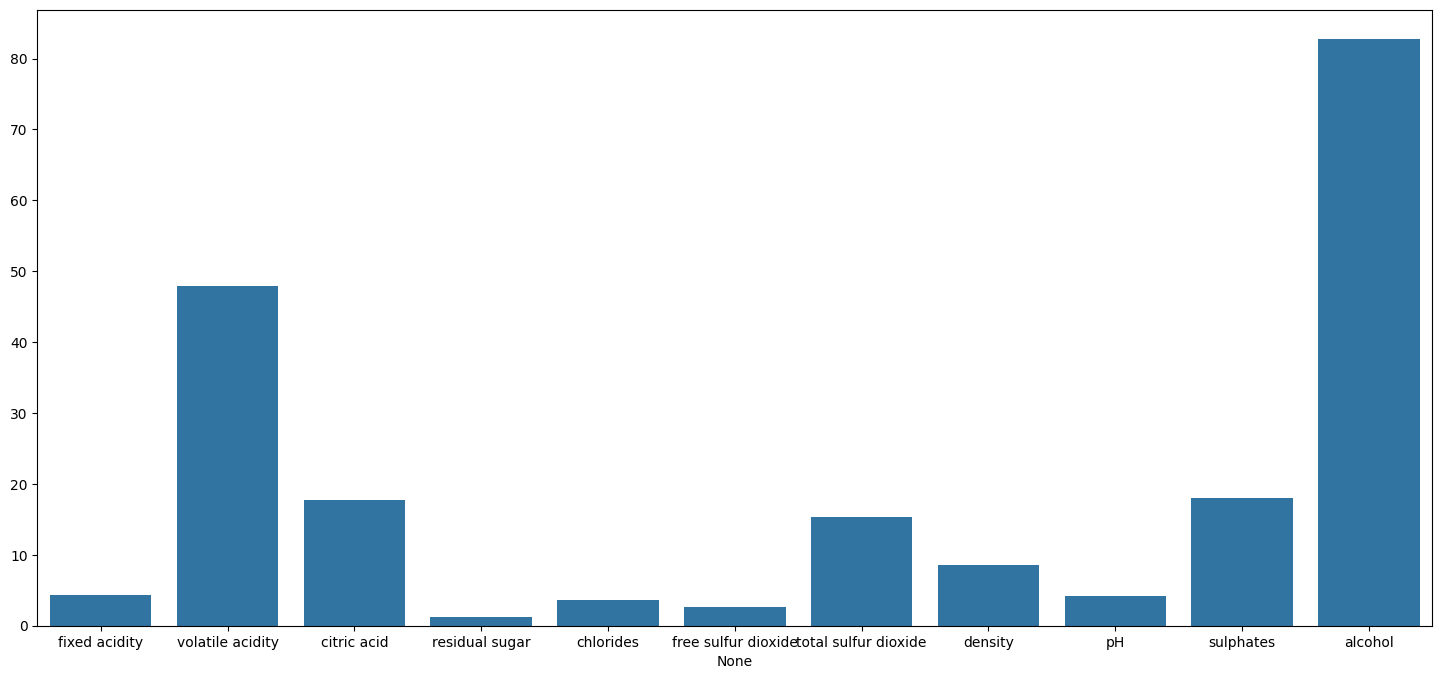

In [23]:
for i, j in enumerate(X.columns):
    print(f"{j} : {feature_contribution[i]:.2f}%")

plt.figure(figsize=(18, 8))
sns.barplot(x=X.columns, y=fs.scores_)
plt.show()

In the target set (`X`), I will leave only features of higher importance

In [23]:
X_fs = X[
    [
        "volatile acidity",
        "citric acid",
        "chlorides",
        "total sulfur dioxide",
        "sulphates",
        "alcohol",
    ]
]

<font size="+2"><b style="font-weight:normal">3.16 <span style='color:#FF281B; font-weight:normal'>|</span> PCA </b></font>

To better understand the inner workings of PCA, I've decided to use it from scratch

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

Now, it is time to plot cumulative sum of explained varianced

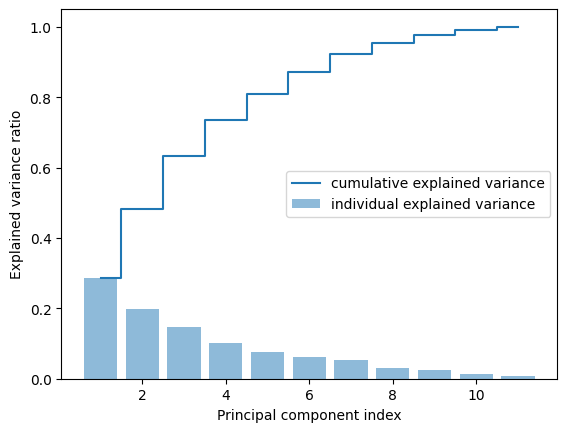

In [31]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(
    range(1, 12),
    var_exp,
    alpha=0.5,
    align="center",
    label="individual explained variance",
)
plt.step(range(1, 12), cum_var_exp, where="mid", label="cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.show()

We see that the first component covers only 30% of the variance in the data. However, despite the different approach, the method of using ANOVA for feature selection gives better results in all metrics.

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [
    (np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))
]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [30]:
w = np.hstack(
    (
        eigen_pairs[0][1][:, np.newaxis],
        eigen_pairs[1][1][:, np.newaxis],
        eigen_pairs[2][1][:, np.newaxis],
        eigen_pairs[3][1][:, np.newaxis],
        eigen_pairs[4][1][:, np.newaxis],
        # eigen_pairs[5][1][:, np.newaxis],
    )
)
print("Matrix W:\n", w)

Matrix W:
 [[-0.48483799  0.07335443  0.14112217  0.23611613  0.11201296]
 [ 0.22737375 -0.31484772  0.41662916 -0.11438566 -0.23521569]
 [-0.46076086  0.15689959 -0.23452379  0.0719657   0.09162011]
 [-0.1745824  -0.24454164 -0.11471732  0.42100851 -0.67037246]
 [-0.23746102 -0.16815639 -0.00602454 -0.65717902 -0.23349925]
 [ 0.07875179 -0.48071193 -0.46184901  0.08539355  0.16157381]
 [ 0.02000717 -0.55056812 -0.34857825  0.05977008  0.23997044]
 [-0.39108587 -0.27277646  0.30700001  0.16876032 -0.20240235]
 [ 0.4238316   0.01373547 -0.05965341  0.01293197 -0.35967312]
 [-0.24633414  0.06460582 -0.34314572 -0.49021157 -0.27870918]
 [ 0.119172    0.41208808 -0.43351941  0.19244327 -0.2968318 ]]


<a id='content-four'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Machine Learning</center></b></div>
<div style="padding:10px;">  </div>

<font size="+2"><b style="font-weight:normal">4.1 <span style='color:#FF281B; font-weight:normal'>|</span> Data split </b></font>

Using `stratify` to train model on equal amount of cases

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fs, y, stratify=y, test_size=0.15, random_state=0, shuffle=True
)

<font size="+2"><b style="font-weight:normal">4.2 <span style='color:#FF281B; font-weight:normal'>|</span> Oversampling data </b></font>

I have decided to use RandomOverSampler to oversample the data. This gave the best result in most metrics. Using undersampling would not make sense due to the low amount of `quality` at values of 0, 1 and 5.

In [33]:
oversample = RandomOverSampler(random_state=0)

In [34]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

<Axes: xlabel='quality', ylabel='count'>

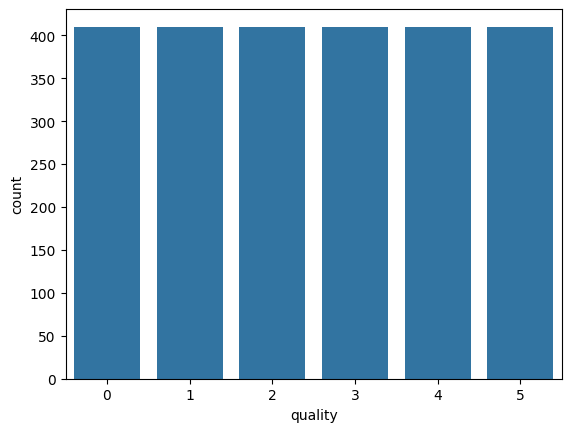

In [35]:
sns.countplot(data=X_train, x=y_train)

Now each value has the same number of instances

<font size="+2"><b style="font-weight:normal">4.3 <span style='color:#FF281B; font-weight:normal'>|</span> Data scaling </b></font>

As we stated at the beginning, we will scale the data using `QuantileTransformer` to resemble a normal distribution. This achieves better model performance compared to normalizing the data.

In [36]:
# scaler = StandardScaler()
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<font size="+2"><b style="font-weight:normal">4.4 <span style='color:#FF281B; font-weight:normal'>|</span> Model training </b></font>

I used the following metrics to compare model quality:
- Model accuracy
- Precision
- Recall
- F1
- Cross-validation accuracy

To represent this, I used the `classification_report` function, which shows the individual measures for a given label and their averages.

I decided to test 7 different models:
1. DecisionTreeClassifier
2. RandomForestClassifier
3. KNeighborsClassifier
4. SVC
5. logisticRegression
6. XGBoostClassifier
7. CatBoostClassifier

In all possible I declared the same value of `random_state` (as in previous cases) in order to make the project repeatable.<br>
I use the default values of the hyperparameters (except for `random_state`), as the effect of the hyperparameters on the accuracy of the model will be studied later in the project

In [38]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
    XGBClassifier(random_state=0),
    CatBoostClassifier(random_seed=0)
]
models_comparison = {}

for model in models:
    print(f"Model: {model.__class__.__name__}\n")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")

    models_comparison[f"{model.__class__.__name__}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
    ]

Model: DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.20      0.20         5
           2       0.67      0.55      0.60        73
           3       0.51      0.59      0.55        70
           4       0.43      0.43      0.43        21
           5       0.17      0.50      0.25         2

    accuracy                           0.53       172
   macro avg       0.33      0.38      0.34       172
weighted avg       0.55      0.53      0.54       172

------------------------------ 

Model: RandomForestClassifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.72      0.79      0.76        73
           3       0.66      0.57      0.61        70
           4       0.56      0.67      0.61        21
           5       0.25      0.50    

<font size="+2"><b style="font-weight:normal">4.5 <span style='color:#FF281B; font-weight:normal'>|</span> Models comparison </b></font>

In [39]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,65.70%,38.51%,42.21%,36.51%
XGBClassifier,65.12%,37.45%,41.43%,35.79%
CatBoostClassifier,63.95%,36.92%,40.95%,34.75%
KNeighborsClassifier,51.74%,33.95%,37.16%,34.63%
DecisionTreeClassifier,53.49%,33.78%,37.70%,32.91%
SVC,41.86%,26.47%,32.96%,28.81%
LogisticRegression,37.21%,25.10%,48.38%,28.00%


In [40]:
models_com_df.style.highlight_max(color="green").set_caption(
    "Maximum Score in each Column"
).format("{:.2%}")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,65.70%,38.51%,42.21%,36.51%
XGBClassifier,65.12%,37.45%,41.43%,35.79%
CatBoostClassifier,63.95%,36.92%,40.95%,34.75%
KNeighborsClassifier,51.74%,33.95%,37.16%,34.63%
DecisionTreeClassifier,53.49%,33.78%,37.70%,32.91%
SVC,41.86%,26.47%,32.96%,28.81%
LogisticRegression,37.21%,25.10%,48.38%,28.00%


In [41]:
models_com_df.style.highlight_min(color="red").set_caption(
    "Minimum Score in each Column"
).format("{:.2%}")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,65.70%,38.51%,42.21%,36.51%
XGBClassifier,65.12%,37.45%,41.43%,35.79%
CatBoostClassifier,63.95%,36.92%,40.95%,34.75%
KNeighborsClassifier,51.74%,33.95%,37.16%,34.63%
DecisionTreeClassifier,53.49%,33.78%,37.70%,32.91%
SVC,41.86%,26.47%,32.96%,28.81%
LogisticRegression,37.21%,25.10%,48.38%,28.00%


* The XGBClassifier model had the best metric values, while LogisticRegression (for Accuracy, F1 and Recall) and SVC (for Precision) had the worst.
* Due to the low number of `quality` feature in the values (0, 1, 5), the models did not do very well in labeling the data correctly.

<a id='content-five'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Cross-Validation (parameter fine-tuning)</center></b></div>
<div style="padding:10px;">  </div>

In [42]:
models_comparison = {}
models_com_df_o = models_com_df.copy()
f1 = make_scorer(f1_score , average='macro')
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

<font size="+2"><b style="font-weight:normal">5.1 <span style='color:#FF281B; font-weight:normal'>|</span> DecisionTreeClassifier </b></font>

Zdecydowałem się na użycie `GridSearchCV` do sprawdzenia i znalezienia najlepszej kombinacji hiperparametrów w zadanych przeze mnie wartościach

In [43]:
parameters = {
    "max_depth": range(5, 21),
    "criterion": ["gini", "entropy", "log_loss"],
}

model = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
clf.fit(X_train, y_train)

model = DecisionTreeClassifier(random_state=0, **clf.best_params_).fit(X_train, y_train)
y_pred = clf.predict(X_test)

models_comparison["DecisionTreeClassifier"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.004975,0.001530,0.001210,0.000520,gini,19,"{'criterion': 'gini', 'max_depth': 19}",0.862581,0.881919,0.859135,0.852685,0.869927,0.865249,0.010021,1
41,0.006892,0.001601,0.000977,0.000366,log_loss,14,"{'criterion': 'log_loss', 'max_depth': 14}",0.844340,0.883493,0.864585,0.865963,0.867082,0.865093,0.012444,2
25,0.004830,0.000798,0.000889,0.000225,entropy,14,"{'criterion': 'entropy', 'max_depth': 14}",0.844340,0.883493,0.864585,0.865963,0.867082,0.865093,0.012444,2


<font size="+2"><b style="font-weight:normal">5.2 <span style='color:#FF281B; font-weight:normal'>|</span> RandomForestClassifier </b></font>

In [44]:
parameters = {
    "n_estimators": [250, 500, 750, 1000],
    "max_depth": range(5, 21),
    "max_features": ["sqrt", "log2", None],
}

model = RandomForestClassifier(random_state=0)

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
print("Searching for best hyperparameters...")
clf.fit(X_train, y_train)

model = RandomForestClassifier(random_state=0, **clf.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)

models_comparison["RandomForestClassifier"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

Searching for best hyperparameters...


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
98,1.215352,0.059025,0.046073,0.005638,13,sqrt,750,"{'max_depth': 13, 'max_features': 'sqrt', 'n_e...",0.891205,0.915248,0.890899,0.890370,0.890914,0.895727,0.009764,1
102,1.137413,0.013867,0.039314,0.002720,13,log2,750,"{'max_depth': 13, 'max_features': 'log2', 'n_e...",0.891205,0.915248,0.890899,0.890370,0.890914,0.895727,0.009764,1
121,0.745980,0.014442,0.029316,0.006229,15,sqrt,500,"{'max_depth': 15, 'max_features': 'sqrt', 'n_e...",0.891205,0.913230,0.888803,0.888164,0.893591,0.894998,0.009315,3


<font size="+2"><b style="font-weight:normal">5.3 <span style='color:#FF281B; font-weight:normal'>|</span> KNeighborsClassifier </b></font>

In [45]:
parameters = {
    "n_neighbors": range(5, 11),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
}

model = KNeighborsClassifier()

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
clf.fit(X_train, y_train)

model = KNeighborsClassifier(**clf.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)

models_comparison["KNeighborsClassifier"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001099,0.000168,0.005520,0.000481,ball_tree,5,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.832262,0.857401,0.851452,0.850178,0.832863,0.844831,0.010312,1
25,0.000762,0.000706,0.008567,0.009467,brute,5,distance,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",0.832262,0.857401,0.851452,0.850178,0.832863,0.844831,0.010312,1
13,0.001260,0.000811,0.002480,0.000452,kd_tree,5,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'we...",0.832262,0.857401,0.851452,0.850178,0.832863,0.844831,0.010312,1


<font size="+2"><b style="font-weight:normal">5.4 <span style='color:#FF281B; font-weight:normal'>|</span> SVC </b></font>

In [46]:
parameters = {
    "C": range(1, 16),
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "decision_function_shape": ["ovo", "ovr"],
}

model = SVC(random_state=0)

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
clf.fit(X_train, y_train)

model = SVC(random_state=0, **clf.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)

models_comparison["SVC"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
114,0.039967,0.006673,0.020552,0.002702,15,ovo,rbf,"{'C': 15, 'decision_function_shape': 'ovo', 'k...",0.808113,0.825473,0.829968,0.820408,0.811975,0.819188,0.008147,1
118,0.041765,0.003555,0.022789,0.004918,15,ovr,rbf,"{'C': 15, 'decision_function_shape': 'ovr', 'k...",0.808113,0.825473,0.829968,0.820408,0.811975,0.819188,0.008147,1
110,0.048867,0.009143,0.019126,0.003436,14,ovr,rbf,"{'C': 14, 'decision_function_shape': 'ovr', 'k...",0.808113,0.825208,0.827729,0.806278,0.811975,0.815861,0.008890,3


<font size="+2"><b style="font-weight:normal">5.5 <span style='color:#FF281B; font-weight:normal'>|</span> LogisticRegression </b></font>

In [47]:
parameters = {
    "C": range(1, 16),
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "penalty": ["l1", "l2", "elasticnet", None],
    "max_iter": [1000, 10000, 100000]
}

model = LogisticRegression(random_state=0)

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
clf.fit(X_train, y_train)

model = LogisticRegression(random_state=0, **clf.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)

models_comparison["LogisticRegression"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

/Users/codeplayer/Różne rzeczy/Resume Projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/codeplayer/Różne rzeczy/Resume Projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/codeplayer/Różne rzeczy/Resume Projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/codeplayer/Różne rzeczy/Resume Projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/codeplayer/Różne rzeczy/Resume Projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setti

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
144,0.031236,0.001308,0.000665,0.000020,3,10000,l1,saga,"{'C': 3, 'max_iter': 10000, 'penalty': 'l1', '...",0.572197,0.558938,0.578816,0.535544,0.526939,0.554487,0.020214,1
164,0.038236,0.002785,0.000780,0.000027,3,100000,l1,saga,"{'C': 3, 'max_iter': 100000, 'penalty': 'l1', ...",0.572197,0.558938,0.578816,0.535544,0.526939,0.554487,0.020214,1
124,0.038373,0.003713,0.000815,0.000061,3,1000,l1,saga,"{'C': 3, 'max_iter': 1000, 'penalty': 'l1', 's...",0.572197,0.558938,0.578816,0.535544,0.526939,0.554487,0.020214,1


<font size="+2"><b style="font-weight:normal">5.6 <span style='color:#FF281B; font-weight:normal'>|</span> XGBClassifier </b></font>

In [48]:
parameters = {
    "learning_rate": [x / 10.0 for x in range(1, 11)],
    "max_depth": range(3, 11),
}

model = XGBClassifier(random_state=0)

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
clf.fit(X_train, y_train)

model = XGBClassifier(random_state=0, **clf.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)

models_comparison["XGBClassifier"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.106027,0.014742,0.006394,0.001990,0.6,5,"{'learning_rate': 0.6, 'max_depth': 5}",0.876297,0.904453,0.885523,0.885523,0.902349,0.890829,0.010824,1
36,0.135868,0.013010,0.008875,0.002134,0.5,7,"{'learning_rate': 0.5, 'max_depth': 7}",0.871750,0.910978,0.889750,0.886090,0.894157,0.890545,0.012683,2
66,0.085400,0.018171,0.004842,0.001771,0.9,5,"{'learning_rate': 0.9, 'max_depth': 5}",0.874247,0.897925,0.880749,0.899656,0.898019,0.890119,0.010526,3


<font size="+2"><b style="font-weight:normal">5.7 <span style='color:#FF281B; font-weight:normal'>|</span> CatBoostClassifier </b></font>

In [49]:
parameters = {
    "depth": range(1, 11),
    "learning_rate": [x / 10.0 for x in range(1, 11)],
    # "l2_leaf_reg": [1, 3, 5, 10, 100],
    "iterations": range(10, 100, 10),
}

model = CatBoostClassifier(random_seed=0, logging_level="Silent")

clf = GridSearchCV(model, parameters, n_jobs=-1, scoring=f1, cv=cv)
clf.fit(X_train, y_train)

model = CatBoostClassifier(random_seed=0, **clf.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)

models_comparison["CatBoostClassifier"] = [
    accuracy_score(y_pred, y_test),
    f1_score(y_pred, y_test, average="macro"),
    precision_score(y_pred, y_test, average="macro"),
    recall_score(y_pred, y_test, average="macro"),
]

results_df = pd.DataFrame(clf.cv_results_)
results_df.sort_values("mean_test_score", ascending=False).head(3)
# results_df[["params", "mean_test_score"]].sort_values(
#     "mean_test_score", ascending=False
# ).head(3)

0:	learn: 1.0493807	total: 6.33ms	remaining: 500ms
1:	learn: 0.7959732	total: 13.7ms	remaining: 534ms
2:	learn: 0.6553024	total: 20.1ms	remaining: 516ms
3:	learn: 0.5521180	total: 27.5ms	remaining: 523ms
4:	learn: 0.4841251	total: 34ms	remaining: 509ms
5:	learn: 0.4307473	total: 40.4ms	remaining: 498ms
6:	learn: 0.3949800	total: 46.9ms	remaining: 489ms
7:	learn: 0.3633062	total: 53.2ms	remaining: 479ms
8:	learn: 0.3353757	total: 59.5ms	remaining: 470ms
9:	learn: 0.3132222	total: 65.6ms	remaining: 460ms
10:	learn: 0.2914945	total: 72ms	remaining: 452ms
11:	learn: 0.2740499	total: 78.4ms	remaining: 445ms
12:	learn: 0.2605239	total: 84.7ms	remaining: 437ms
13:	learn: 0.2424376	total: 91.4ms	remaining: 431ms
14:	learn: 0.2285755	total: 98ms	remaining: 425ms
15:	learn: 0.2193828	total: 104ms	remaining: 418ms
16:	learn: 0.2124536	total: 111ms	remaining: 411ms
17:	learn: 0.1997004	total: 119ms	remaining: 409ms
18:	learn: 0.1932396	total: 125ms	remaining: 402ms
19:	learn: 0.1855089	total: 132m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
885,2.654422,0.109115,0.005663,0.003449,10,80,0.6,"{'depth': 10, 'iterations': 80, 'learning_rate...",0.877730,0.925480,0.889556,0.883704,0.885613,0.892417,0.016966,1
896,3.699108,0.474388,0.008282,0.003586,10,90,0.7,"{'depth': 10, 'iterations': 90, 'learning_rate...",0.868692,0.923456,0.884873,0.888552,0.887281,0.890571,0.017930,2
876,2.462712,0.114862,0.003690,0.001340,10,70,0.7,"{'depth': 10, 'iterations': 70, 'learning_rate...",0.868557,0.925342,0.888941,0.881883,0.887700,0.890485,0.018868,3


<font size="+2"><b style="font-weight:normal">5.8 <span style='color:#FF281B; font-weight:normal'>|</span> Comparison of model metrics with the best hyperparameters </b></font>

In [50]:
models_com_df_o = models_com_df_o.sort_values(by="Model F1-Score", ascending=False)
models_com_df_o.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,65.70%,38.51%,42.21%,36.51%
XGBClassifier,65.12%,37.45%,41.43%,35.79%
CatBoostClassifier,63.95%,36.92%,40.95%,34.75%
KNeighborsClassifier,51.74%,33.95%,37.16%,34.63%
DecisionTreeClassifier,53.49%,33.78%,37.70%,32.91%
SVC,41.86%,26.47%,32.96%,28.81%
LogisticRegression,37.21%,25.10%,48.38%,28.00%


In [51]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,67.44%,38.82%,42.36%,36.86%
DecisionTreeClassifier,57.56%,36.75%,39.90%,35.98%
XGBClassifier,62.79%,36.55%,40.47%,34.65%
KNeighborsClassifier,58.14%,36.44%,39.76%,35.99%
CatBoostClassifier,65.70%,33.36%,34.13%,32.70%
SVC,51.74%,32.34%,36.61%,30.92%
LogisticRegression,38.37%,25.89%,48.86%,28.28%


<a id='content-five'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Binary Classification</center></b></div>
<div style="padding:10px;">  </div>

<font size="+2"><b style="font-weight:normal">6.1 <span style='color:#FF281B; font-weight:normal'>|</span> Adjusting the data </b></font>

In [52]:
y_binary = np.where(y > 3, 1, 0)

In [53]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_fs, y_binary, test_size=0.2, random_state=0, shuffle=True
)

In [54]:
X_train_binary = scaler.fit_transform(X_train_binary)
X_test_binary = scaler.transform(X_test_binary)

<Axes: ylabel='count'>

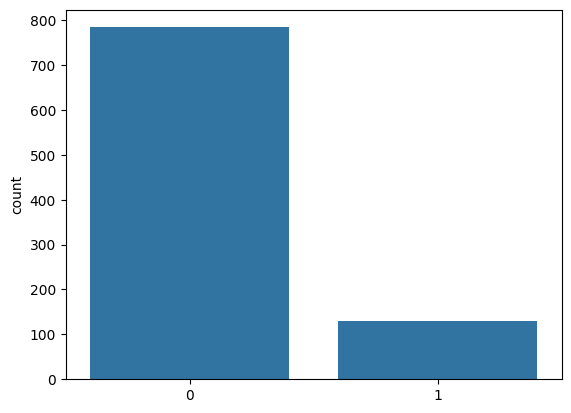

In [55]:
sns.countplot(x=y_train_binary)

There are more bad quality wines than good quality wines

In [56]:
oversampler = RandomOverSampler(random_state=0)
X_train_binary, y_train_binary = oversample.fit_resample(X_train_binary, y_train_binary)

<Axes: ylabel='count'>

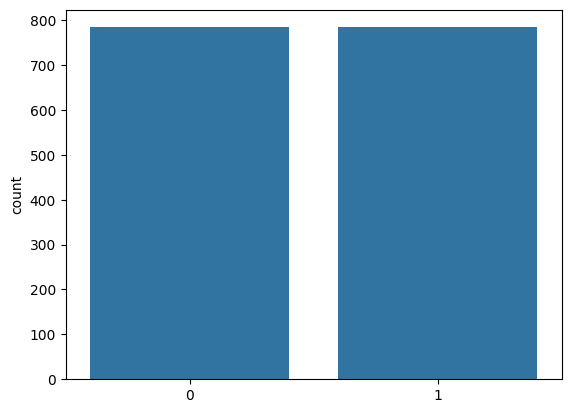

In [57]:
sns.countplot(x=y_train_binary)

In [58]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
    XGBClassifier(random_state=0),
    CatBoostClassifier(random_seed=0, logging_level="Silent")
]
models_comparison = {}

for model in models:
    print(f"Model: {model.__class__.__name__}\n")
    model.fit(X_train_binary, y_train_binary)
    
    y_pred_binary = model.predict(X_test_binary)
    
    print(classification_report(y_test_binary, y_pred_binary))
    print("-" * 30, "\n")
    
    models_comparison[f"{model.__class__.__name__}"] = [
        accuracy_score(y_pred_binary, y_test_binary),
        f1_score(y_pred_binary, y_test_binary, average="macro"),
        precision_score(y_pred_binary, y_test_binary, average="macro"),
        recall_score(y_pred_binary, y_test_binary, average="macro"),
    ]

Model: DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       200
           1       0.55      0.55      0.55        29

    accuracy                           0.89       229
   macro avg       0.74      0.74      0.74       229
weighted avg       0.89      0.89      0.89       229

------------------------------ 

Model: RandomForestClassifier

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       200
           1       0.59      0.55      0.57        29

    accuracy                           0.90       229
   macro avg       0.76      0.75      0.76       229
weighted avg       0.89      0.90      0.89       229

------------------------------ 

Model: KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       200
           1       0.32      0.66      0.43        29

    accuracy             

In [61]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,89.52%,75.59%,74.84%,76.41%
DecisionTreeClassifier,88.65%,74.34%,74.34%,74.34%
XGBClassifier,88.65%,74.34%,74.34%,74.34%
CatBoostClassifier,86.46%,73.55%,77.51%,71.10%
LogisticRegression,78.17%,67.55%,80.13%,65.83%
SVC,75.98%,65.07%,77.41%,64.06%
KNeighborsClassifier,78.17%,64.83%,72.76%,63.16%


In [60]:
models_com_df.style.highlight_max(color="green").set_caption(
    "Maximum Score in each Column"
).format("{:.2%}")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,89.52%,75.59%,74.84%,76.41%
DecisionTreeClassifier,88.65%,74.34%,74.34%,74.34%
XGBClassifier,88.65%,74.34%,74.34%,74.34%
CatBoostClassifier,86.46%,73.55%,77.51%,71.10%
LogisticRegression,78.17%,67.55%,80.13%,65.83%
SVC,75.98%,65.07%,77.41%,64.06%
KNeighborsClassifier,78.17%,64.83%,72.76%,63.16%


In [62]:
models_com_df.style.highlight_min(color="red").set_caption(
    "Minimum Score in each Column"
).format("{:.2%}")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,89.52%,75.59%,74.84%,76.41%
DecisionTreeClassifier,88.65%,74.34%,74.34%,74.34%
XGBClassifier,88.65%,74.34%,74.34%,74.34%
CatBoostClassifier,86.46%,73.55%,77.51%,71.10%
LogisticRegression,78.17%,67.55%,80.13%,65.83%
SVC,75.98%,65.07%,77.41%,64.06%
KNeighborsClassifier,78.17%,64.83%,72.76%,63.16%


<a id='content-seven'></a>
<div style="color:white; background:#D2042D; padding:20px; border-radius:8px; font-size:26px;"><b style="font-weight: 700;"><center>Summary of the project</center></b></div>
<div style="padding:10px;">  </div>

<div style="font-size: 17px; text-align: justify; text-justify: inter-word;">
    <ul>
        <li>Checking the importance of features allows to reduce the complexity of the model, which consequently reduces the tendency of the model to overfitting</li>
        <li>It is important to divide the data properly. I divided the collection only into training and test and used from the validation cros, due to the very low amount of data (a little more than 1100)</li>
        <li>The best way to evaluate models is to use different metrics. Accuracy alone doesn't say much, as a score of 82%, for example, sounds good, but in reality the model may perform poorly due to an unbalanced data set (as in this example).</li>
    </ul>
</div>
<br>
<div style="font-size: 17px; text-align: justify; text-justify: inter-word;">
    <strong>Explanation of the actions taken:</strong>
<br>
<br>
1.4
<br>
I found that it would be better for me to work on labels starting with 0. Therefore, in order not to modify the original data, I made a copy.
<br>
<br>
3.4
<br>
I wanted to see what the distribution of data looks like and review outlier observations.
<br>
<br>
3.5
<br>
I wanted to present how unbalanced the data (classes) are.
<br>
<br>
3.6
<br>
Search for interesting correlations between given features found in the dataset.
<br>
<br>
3.7
<br>
Since the focus is mainly on the `quality` feature, I checked how the correlation looks in relation to it.
<br>
<br>
3.8 - 3.14
<br>
Visualization of various interesting correlations in relation to (mainly) to `quality`. This way I can see how certain wine qualities behave depending on certain characteristics.<br>
<br>
3.15
<br>
To ensure that the model is not too large, reduce the number of features to those that will be considered most relevant.
<br>
<br>
4.2
<br>
It is important that the oversampling of data takes place <strong>after</strong> the collection has been split. Otherwise, we may end up with data leakage.
<br>
<br>
4.3
<br>
Normalization also occurs after splitting, but we fit to the training set and then use the same data on the test set. We should not fit again on the next set, since the model has learned on other normalized values.
</div>
